# How to Train YOLOv8 Object Detection on a Custom Dataset
Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

# Plan:
In this notebook, we are going to cover:
- Before you start
- Install YOLOv8
- Download a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model
- Predict
- Export to tflite format

**Let's begin!**

## Before we start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Tue Dec  5 19:50:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    25W / 300W |      2MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+---------

In [ ]:
import os
HOME = os.path.dirname('/content/')
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip (here we are using pip install method)

In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

## Download Dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ekJ5gEYpmUgNswc0SuHe")
project = rf.workspace("lamao").project("sod-enect")
version = project.version(2)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to SOD-2 in yolov8:: 100%|██████████| 48000/48000 [00:13<00:00, 3660.75it/s]


## Custom Training

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 248MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/SOD-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opt

In [ ]:
!ls {HOME}/runs/detect/train/

/content


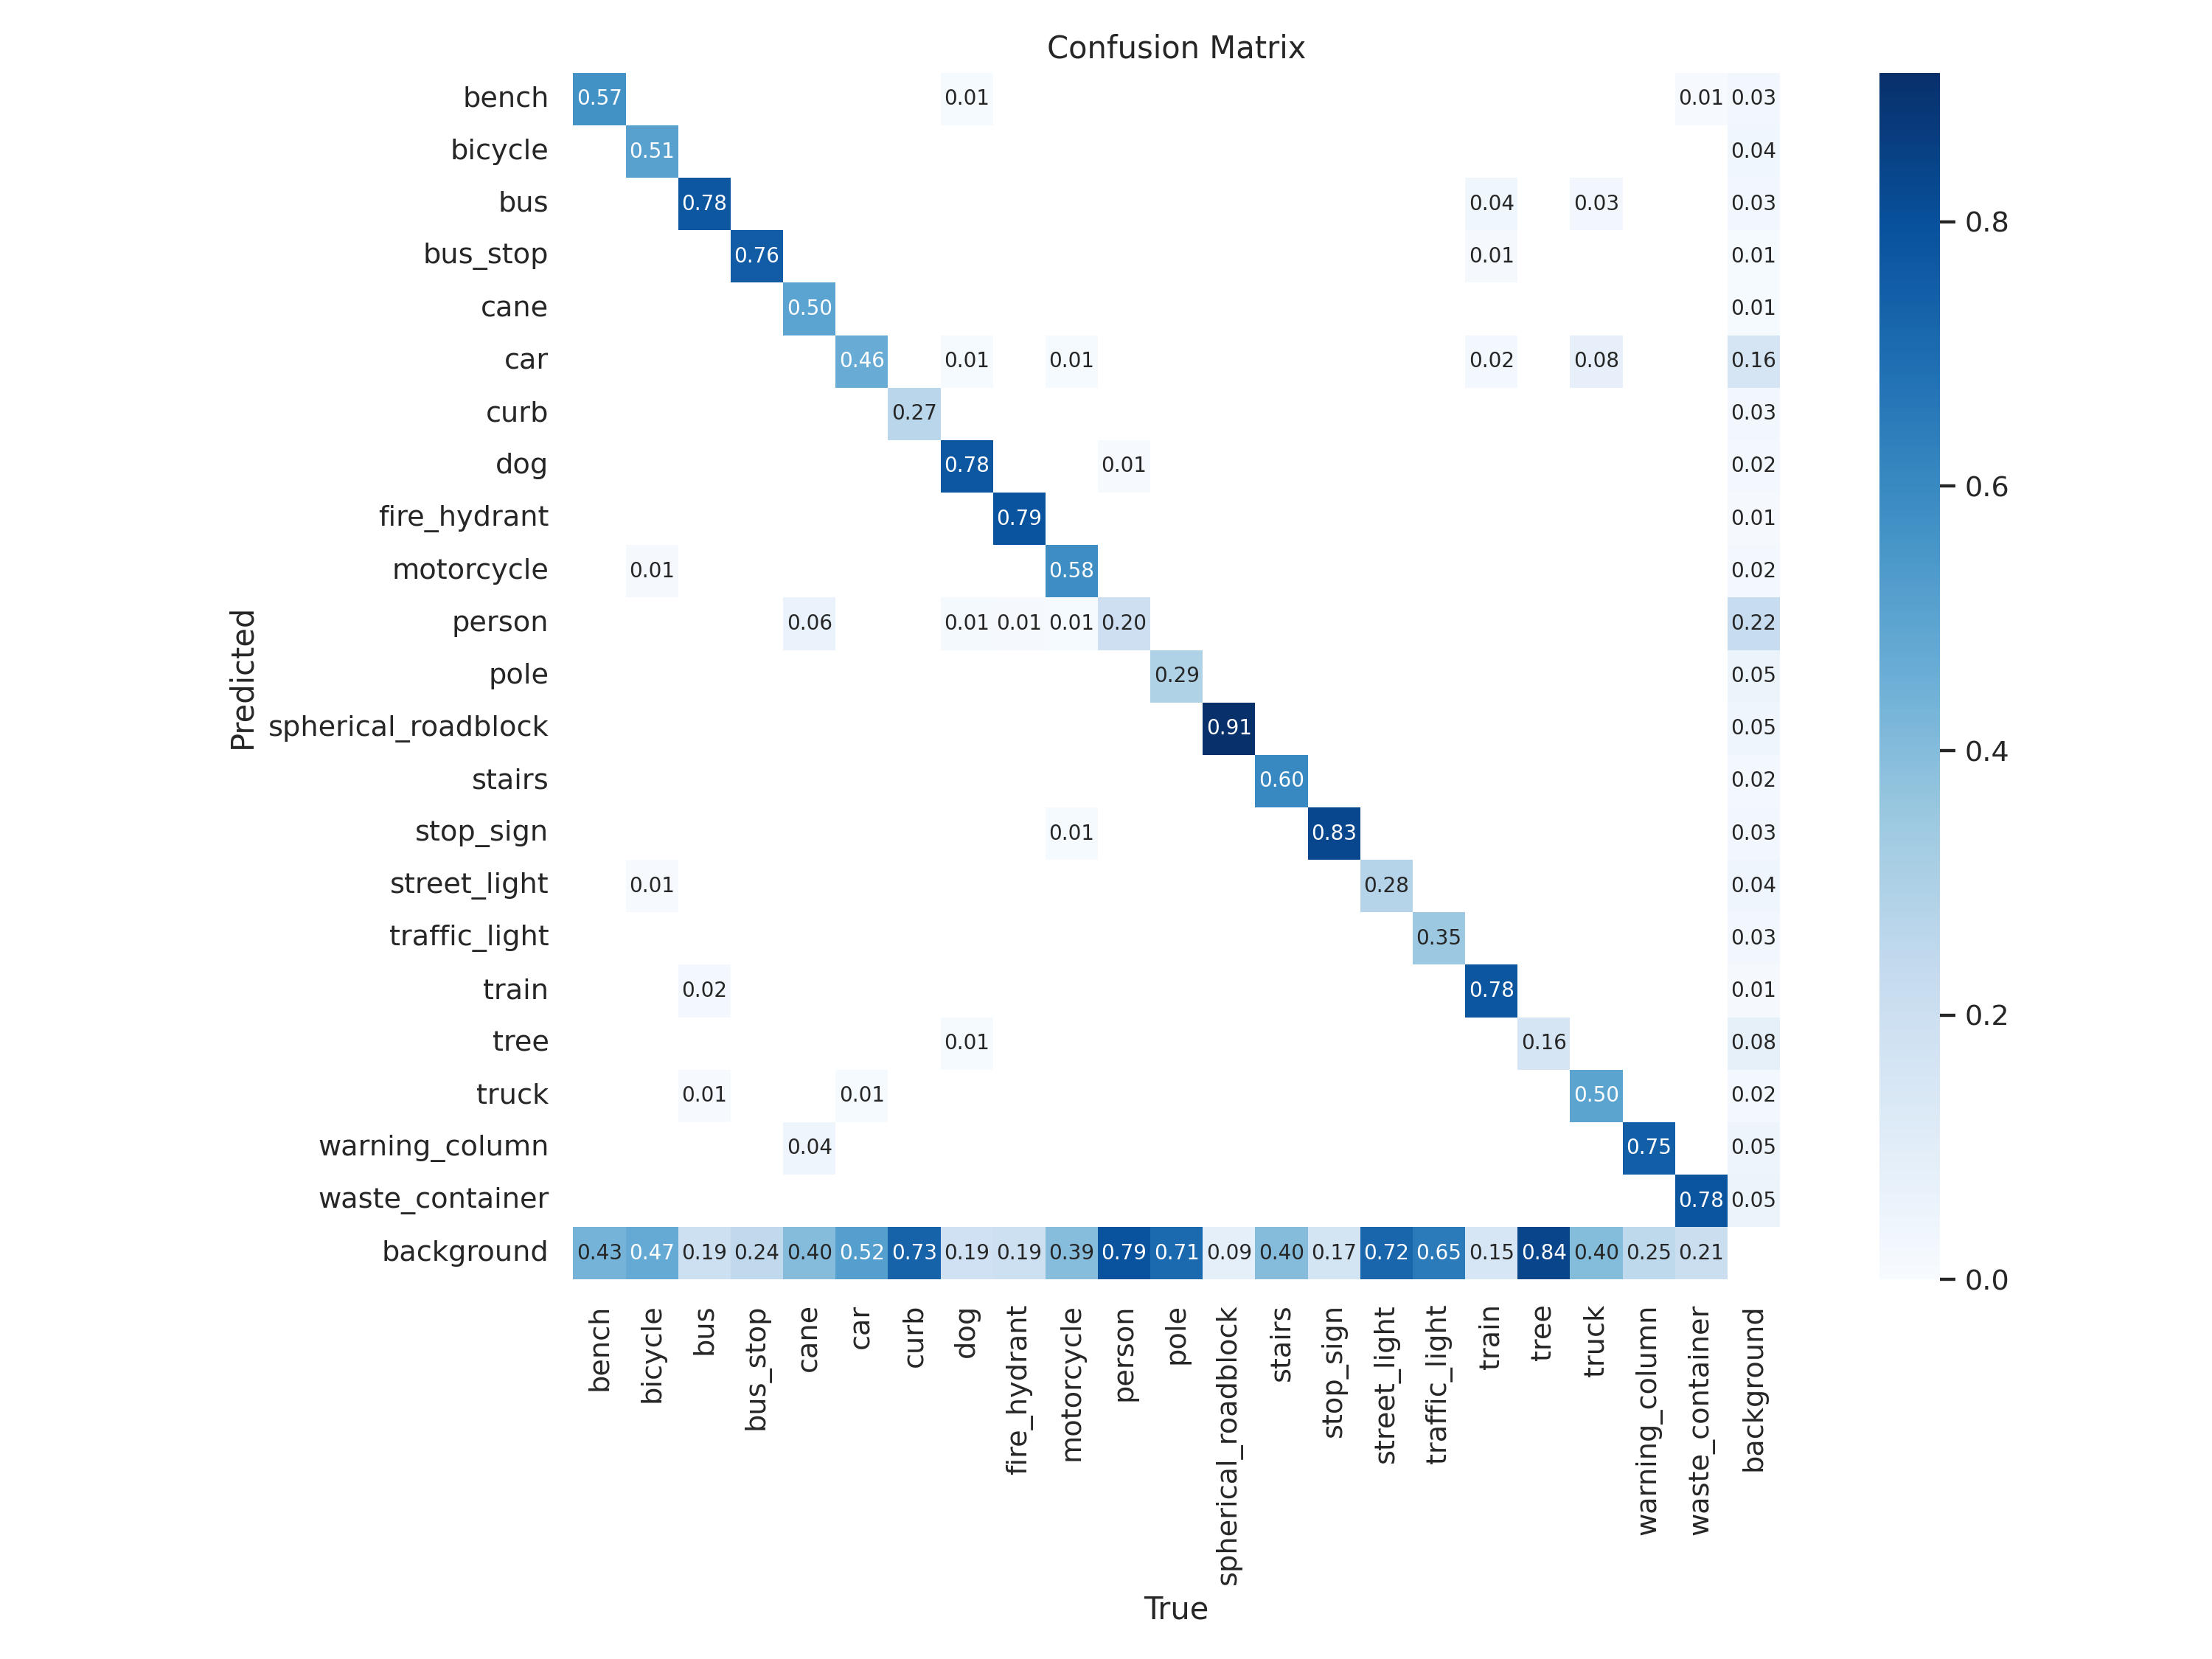

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


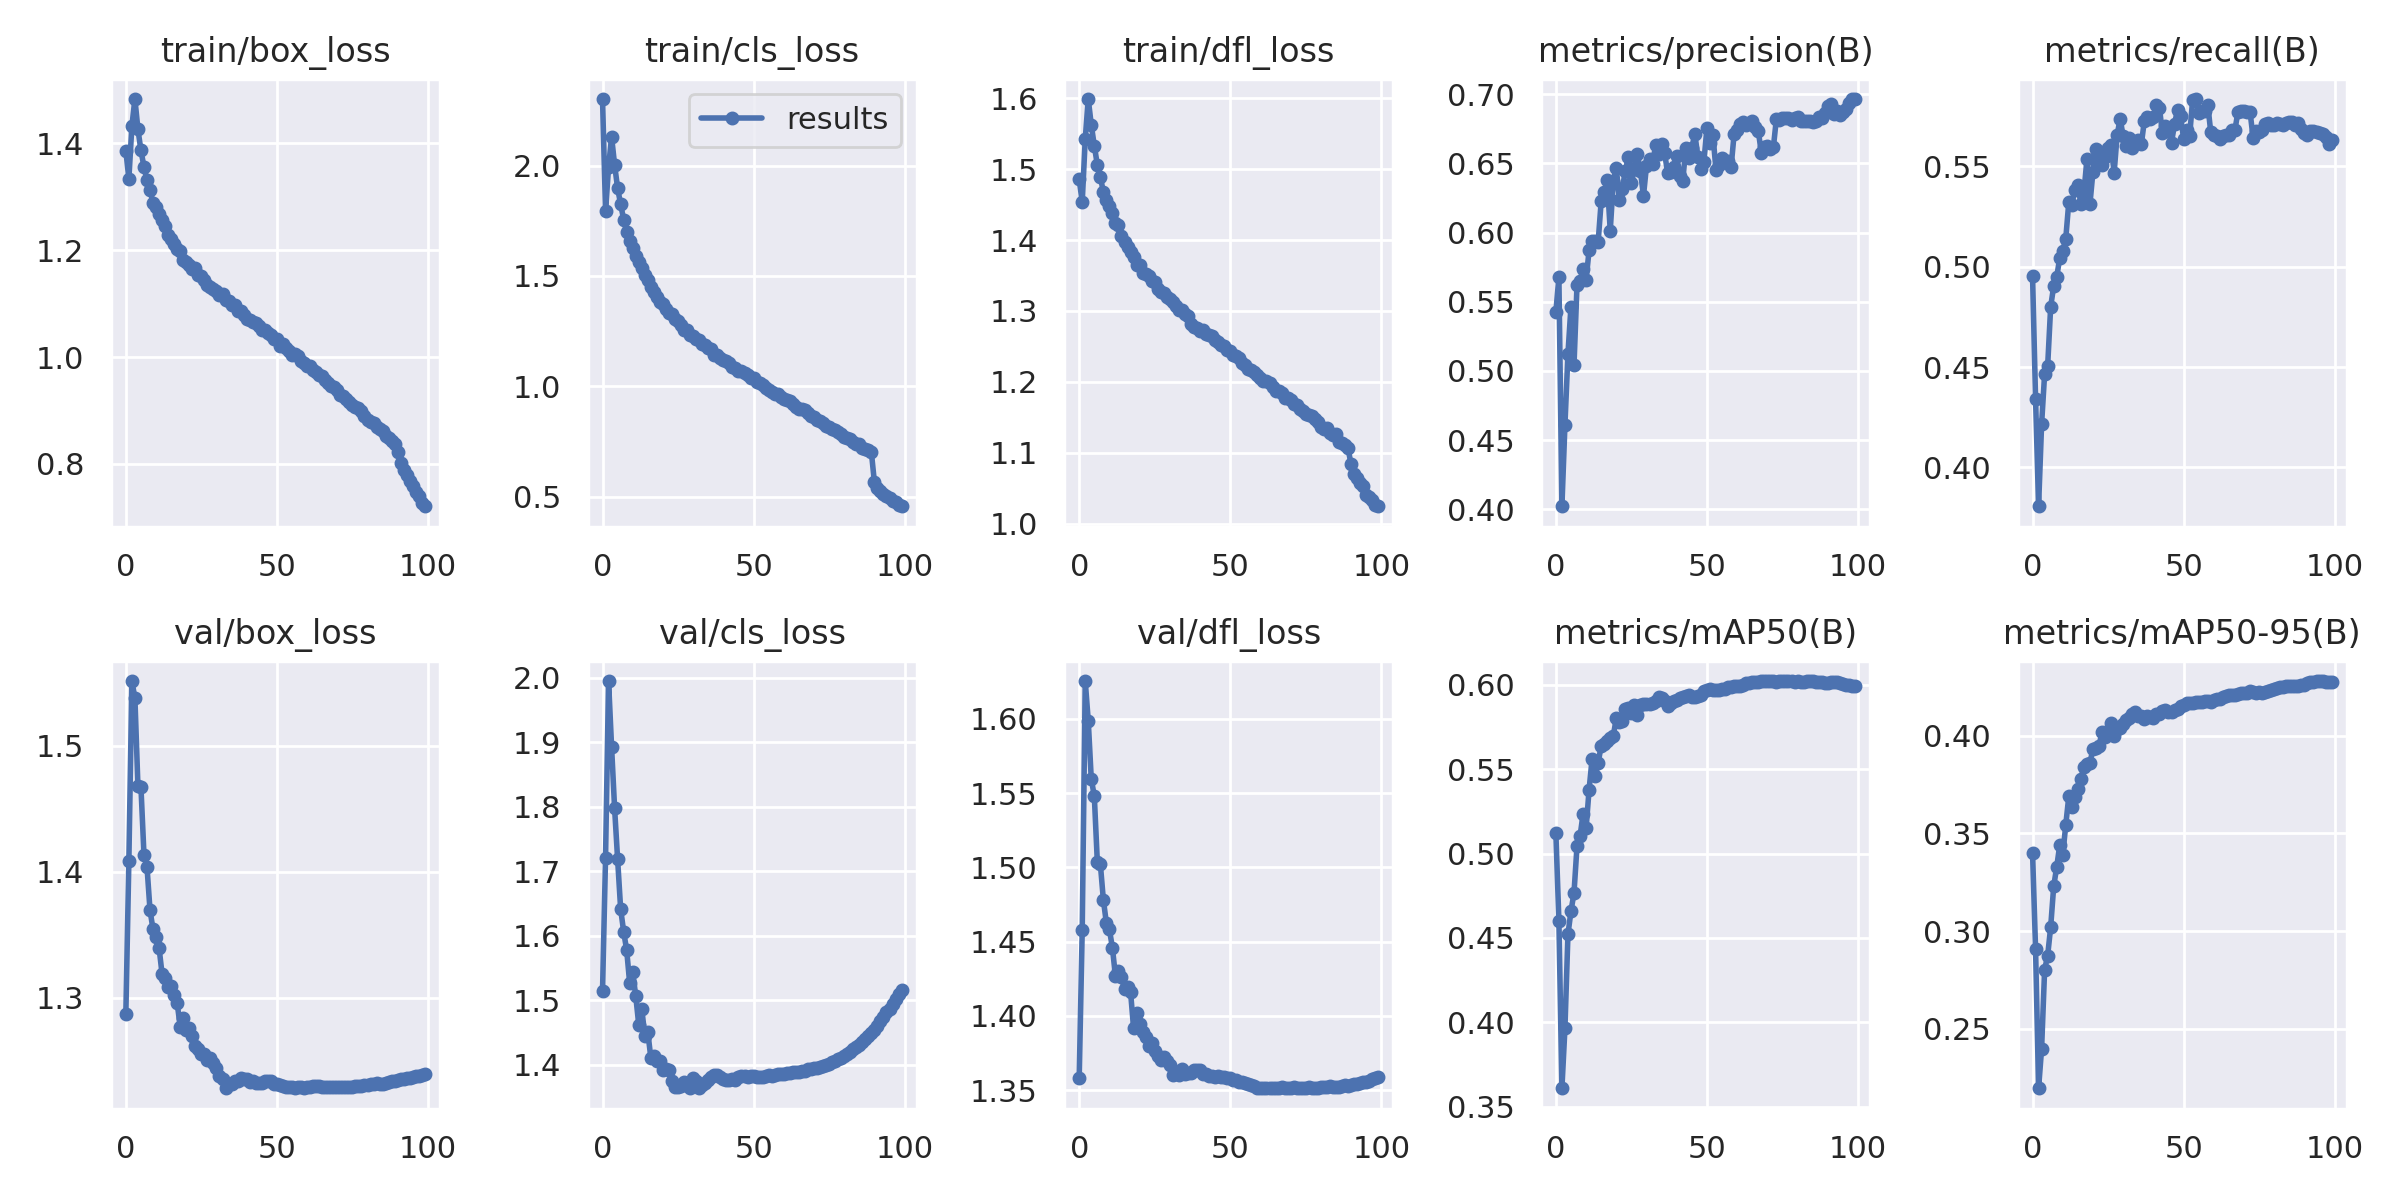

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## Resume (if the trainning process is stoped)

In [ ]:
%cd {HOME}
!yolo task=detect mode=train resume model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True

## Validate Custom Model

In [ ]:
# Validate our custom model
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt imgsz=640 conf=0.25 save=True data={dataset.location}/data.yaml

2024-06-23 20:25:20.448200: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 20:25:20.448249: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 20:25:20.449598: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-23 20:25:20.457115: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-23 20:25:21.641608: W tensorflow/comp

## Inference with Custom Model

In [ ]:
# Run inference with our custom model yolov8s
!yolo task=detect mode=predict data={dataset.location}/data.yaml source={dataset.location}/test/images model=/content/runs/detect/train/weights/best.pt imgsz=640 conf=0.25 save=True

2024-06-23 20:26:56.373082: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 20:26:56.373140: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 20:26:56.375117: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-23 20:26:56.387098: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-23 20:26:58.154984: W tensorflow/comp

## Predict

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt imgsz=640 conf=0.25 source='/content/datasets/SOD-2/test/images/000000454661_jpg.rf.676f61c3c7ba82b3ae13bd4419b70e80.jpg' save=True

/content
2024-06-23 20:33:30.906846: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 20:33:30.906941: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 20:33:30.908915: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-23 20:33:30.921785: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-23 20:33:32.632574: W tensor

/content


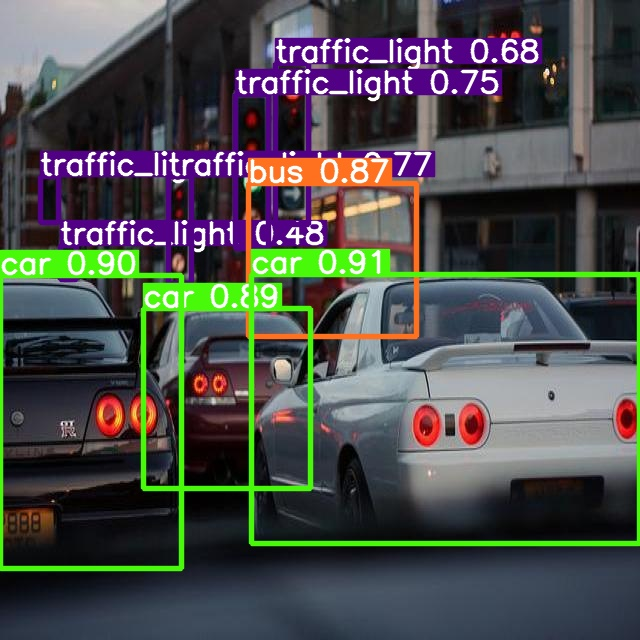

In [ ]:
%cd {HOME}
Image(filename='/content/runs/detect/predict/000000454661_jpg.rf.676f61c3c7ba82b3ae13bd4419b70e80.jpg', height=640)

## Export to tflite format
The export function is supported by tensorflow==2.13.1 version. We need to restart the runtime.

In [ ]:
!pip install tensorflow==2.13.1
import tensorflow as tf
print(tf.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 41.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    F

2.13.1


In [ ]:
import os
HOME = os.path.dirname('/content/')
print(HOME)

/content


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ekJ5gEYpmUgNswc0SuHe")
project = rf.workspace("lamao").project("sod-enect")
version = project.version(2)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to SOD-2 in yolov8:: 100%|██████████| 48000/48000 [00:23<00:00, 2004.29it/s]


In [ ]:
!pip install --upgrade ultralytics
from ultralytics import YOLO
from IPython.display import display, Image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.0/793.0 kB 5.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!yolo export model=/content/runs/detect/train/weights/best.pt format=tflite imgsz=640 int8=True data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.41 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11134098 parameters, 0 gradients, 28.5 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 26, 8400) (21.5 MB)

TensorFlow SavedModel: starting export with tensorflow 2.13.1...

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: slimming with onnxslim 0.1.31...
ONNX: export success ✅ 3.9s, saved as '/content/runs/detect/train/weights/best.onnx' (42.8 MB)
TensorFlow SavedModel: collecting INT8 calibration images from 'data=/content/datasets/SOD-2/data.yaml'
Scanning /content/datasets/SOD-2/SOD-2/valid/labels.cache... 2000 images, 0 backgrounds, 0 corrupt: 100% 2000/2000 [00:00<?, ?it/s]
^C


In [ ]:
# Validate
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=640  data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.41 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Loading /content/runs/detect/train/weights/best_saved_model/best_float32.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
Forcing batch=1 square inference (1,3,640,640) for non-PyTorch models
val: Scanning /content/datasets/SOD-2/SOD-2/valid/labels.cache... 2000 images, 0 backgrounds, 0 corrupt: 100% 2000/2000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2000/2000 [19:52<00:00,  1.68it/s]
                   all       2000       6187       0.67      0.566       0.59      0.414
                 bench        140        241      0.687      0.535      0.589      0.345
               bicycle         83        144      0.649      0.556      0.533      0.353
                   bus        122        161      0.724      0.776      0.779      0.635
              bus_stop         81         82      0.72

In [ ]:
!cat /proc/cpuinfo

In [ ]:
# Run inference .tflite model
!yolo task=detect mode=predict data={dataset.location}/data.yaml source={dataset.location}/test/images model=/content/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=640 int8=True conf=0.25 save=True

Ultralytics YOLOv8.2.41 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Loading /content/runs/detect/train/weights/best_saved_model/best_float32.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.

image 1/1000 /content/datasets/SOD-2/test/images/000000004760_jpg.rf.a40a4cf8b36cf031c4134a0ef8ebf3e3.jpg: 640x640 2 benchs, 1 fire_hydrant, 1015.4ms
image 2/1000 /content/datasets/SOD-2/test/images/000000006040_jpg.rf.6806bb19819ecc42a814b30c8d97d62a.jpg: 640x640 1 train, 843.3ms
image 3/1000 /content/datasets/SOD-2/test/images/000000009945_jpg.rf.64061d23ae2749c5200c88d7f02f2cf3.jpg: 640x640 1 stop_sign, 827.5ms
image 4/1000 /content/datasets/SOD-2/test/images/000000012892_jpg.rf.474dbee1dc49bd6d8a2288d51458b535.jpg: 640x640 1 bus, 840.3ms
image 5/1000 /content/datasets/SOD-2/test/images/000000013352_jpg.rf.cb2da42917374fe8956dc726d81e6404.jpg: 640x640 1 fire_hydrant, 627.5ms
image 6/1000 /content/datasets/SOD-2/test/images/0000000136

/content


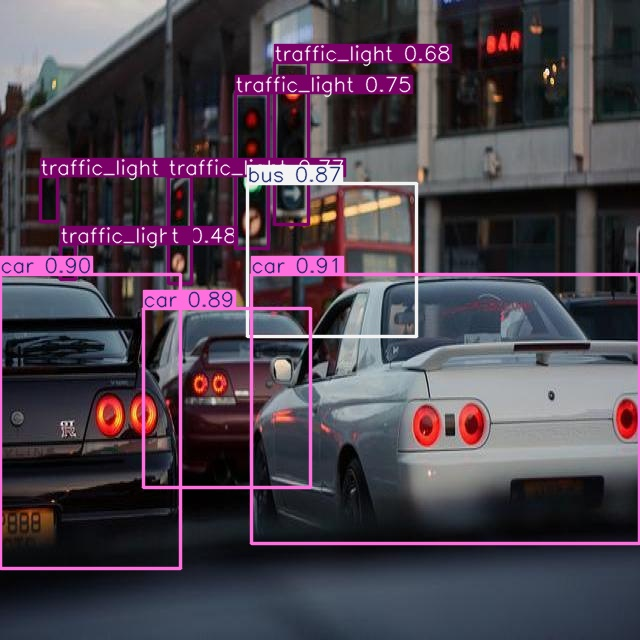

In [ ]:
%cd {HOME}
Image(filename='/content/runs/detect/predict/000000454661_jpg.rf.676f61c3c7ba82b3ae13bd4419b70e80.jpg', height=640)

In [25]:
# Predict with your own image
# set source=0 to start inference on webcam
!yolo predict model=/content/runs/detect/train/weights/best_saved_model/best_float32.tflite source='/content/test.jpg'

Ultralytics YOLOv8.2.41 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/test.jpg: 640x640 1 person, 301.1ms
Speed: 7.9ms preprocess, 301.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


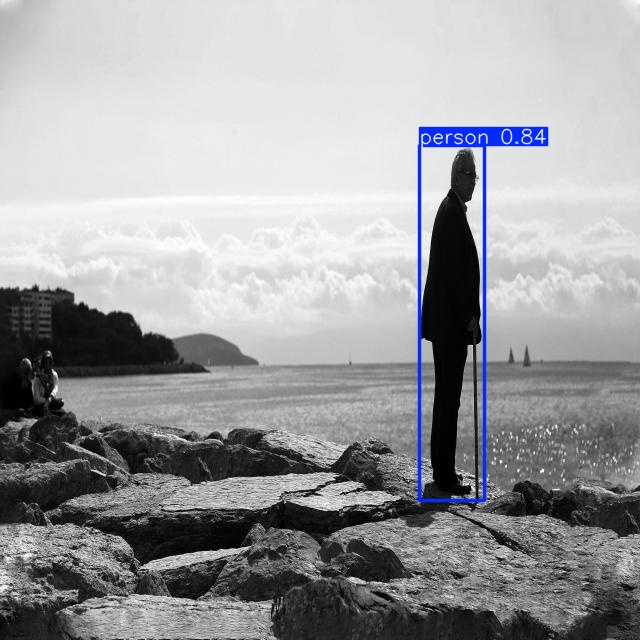

In [26]:
%cd {HOME}
Image(filename='/content/runs/detect/predict2/test.jpg')